In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The Fourier transform is an incredibly useful tool for for many reason stated [elsewhere](https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf). A good explanation of the difference between a Fourier transform and a discrete Fourier transform (DFT) or [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform), can be found in the [Kirkland book, chapter 4.](https://books.google.com/books/about/Advanced_Computing_in_Electron_Microscop.html?id=YscLlyaiNvoC&source=kp_cover) available as an eBook through the U of O library. This text is a good resource for everyone in the McMorran group. To be brief there are differences that can be important between an FFT and an analytical pencil and paper Fourier transform. The end of this document will try to address those.

To be consistent with the numpy [FFT](http://docs.scipy.org/doc/numpy/reference/routines.fft.html) we will define the 1D Fourier transform and inverse Fourier transform as,

$$f(x) = \int_{-\infty}^{\infty}\tilde{F}(k)e^{-2 \pi i k x}dk$$
$$\tilde{F}(k) = \int_{-\infty}^{\infty}f(x)e^{2 \pi i k x}dx$$

# Example 1

Calculate $\tilde{F}(k)$ for $f(x)=\exp{\left(-a|x|\right)}$.

$$\tilde{F}(k) = \int_{-\infty}^{\infty}e^{-a|x|}e^{2 \pi i k x}dx$$

First we break up the integral into two parts

$$\tilde{F}(k) = \int_{-\infty}^{0}e^{a x}e^{2 \pi i k x}dx+\int_{0}^{\infty}e^{-ax}e^{2 \pi i k x}dx$$

then rewrite the integrals to make them more simple by defining $\mu_\pm=  a \pm 2\pi i k$

$$\tilde{F}(k) = \int_{-\infty}^{0}e^{\mu_+ x}dx+\int_{0}^{\infty}e^{-\mu_- x}dx.$$

These are now both simple integrals and we can write the answer,
$$\tilde{F}(k) = \frac{e^{\mu_+ x}}{\mu_+} \bigg|_{x=-\infty}^{x=0} - \frac{e^{-\mu_- x}}{\mu_-} \bigg|_{x=0}^{x=\infty}$$

Pugging $a \pm 2 \pi i k$ back in and realizing $\exp{(-\infty)} \rightarrow 0$ we have
$$\tilde{F}(k) = \frac{1}{a + 2 \pi i k} + \frac{1}{a - 2 \pi i k} .$$


Multiplying the top and bottom of each by its complex conjugate and adding we then have,

$$\tilde{F}(k) = \frac{2a}{a^2+4 \pi^2k^2}$$

which is an important line shape and is called the [Lorentzian](https://en.wikipedia.org/wiki/Cauchy_distribution), and is the line shape for [atomic spectra](https://en.wikipedia.org/wiki/Spectral_line_shape#Line_shape_functions).

# Exercise 1

Plot our result for $\tilde{F}(k)$ from above for the case $a=0.5$ and $a=3$.

In [2]:
def f(x, a):
    return np.exp(-a*(np.abs(x)))

In [3]:
def F(k, a):
    return 2*a/(a**2+(2*np.pi*k)**2) 

C:\Users\Jordan\Anaconda2\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


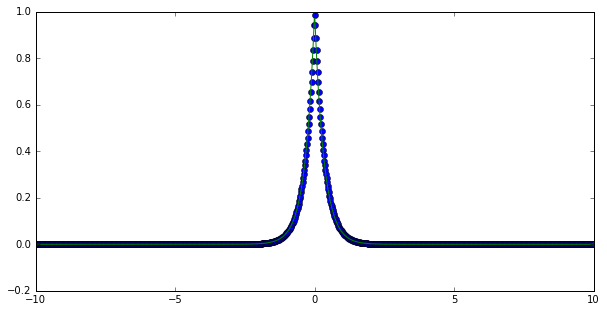

In [4]:
plt.figure(figsize=(10,5))
x = np.linspace(-10,10,1000)
k = np.fft.fftfreq(len(x), d=(x[1]-x[0]))
#plt.plot(x, f(x, 0.5))
plt.plot(x, np.fft.fftshift(np.fft.ifft((1./(x[1]-x[0]))*F(k,3))), 'o')
plt.plot(x, f(x, 3))
plt.show()

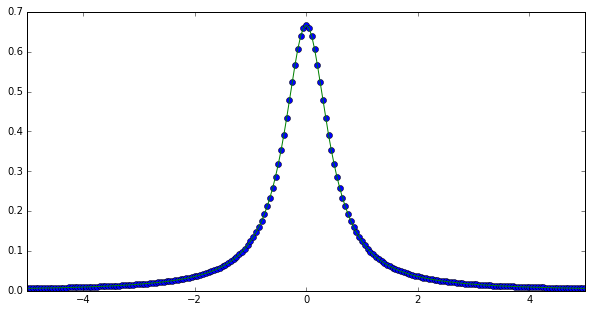

In [5]:
plt.figure(figsize=(10,5))
x = np.linspace(-10,10,1000000)
k = np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
a = 3
plt.plot(k, np.fft.fftshift((x[1]-x[0])*np.abs(np.fft.fft(f(x, a)))), 'o')
plt.plot(k, F(k, a), '-')
plt.xlim([-5,5])
plt.show()

# Example 2

Calculate $\tilde{F}(k)$ for $f(x)=\sin(qx)$.

$$\tilde{F}(k) = \int_{-\infty}^{\infty}\sin(qx)e^{2 \pi i k x}dx$$

First we rewrite $\sin(kx)$ using [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula). 

$$\tilde{F}(k) = \int_{-\infty}^{\infty}\frac{e^{iqx}-e^{-iqx}}{2 i}e^{2 \pi i k x}dx$$

then rewrite the integral as two integrals

$$\tilde{F}(k) = \frac{1}{2 i}\int_{-\infty}^{\infty}e^{iqx}e^{2 \pi i k x}dx - \frac{1}{2 i}\int_{-\infty}^{\infty}e^{-iqx}e^{2 \pi i k x}dx$$

These are now both as simplified as we can get them and we must use the [orthogonality relation](http://mathworld.wolfram.com/FourierTransformDeltaFunction.html) to evaluate them which yields,

$$\tilde{F}(k) = i \pi \delta(2 \pi k - q)-i \pi \delta(2 \pi k + q)$$

Using the definitions above calculate $\tilde{F}(k)$ for the following:

$$f(x) = \cos(k_0 x)$$

$$f(x) = \cos(k_0 x) + \sin(k_1 x)$$

$$f(x)=\exp{\left(-a|x-x_0|\right)}$$